In [1]:
import numpy as np
import h5py

In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x7fe888153a70>
Populating the interactive namespace from numpy and matplotlib


In [3]:
from pycbc.waveform import get_td_waveform

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


# LVKsample maxL parameters

In [4]:
lvkfile = h5py.File('/work/yifan.wang/4ogc/LVK/GWTC-2/GW190521_comoving.h5','r')
lvksample = lvkfile['C01:NRSur7dq4']['posterior_samples']

In [5]:
ii = np.argmax(lvksample['log_likelihood'][:])

In [6]:
lvksample.dtype

dtype([('H1_matched_filter_abs_snr', '<f8'), ('H1_matched_filter_snr_angle', '<f8'), ('H1_optimal_snr', '<f8'), ('H1_spcal_amp_0', '<f8'), ('H1_spcal_amp_1', '<f8'), ('H1_spcal_amp_2', '<f8'), ('H1_spcal_amp_3', '<f8'), ('H1_spcal_amp_4', '<f8'), ('H1_spcal_amp_5', '<f8'), ('H1_spcal_amp_6', '<f8'), ('H1_spcal_amp_7', '<f8'), ('H1_spcal_amp_8', '<f8'), ('H1_spcal_amp_9', '<f8'), ('H1_spcal_phase_0', '<f8'), ('H1_spcal_phase_1', '<f8'), ('H1_spcal_phase_2', '<f8'), ('H1_spcal_phase_3', '<f8'), ('H1_spcal_phase_4', '<f8'), ('H1_spcal_phase_5', '<f8'), ('H1_spcal_phase_6', '<f8'), ('H1_spcal_phase_7', '<f8'), ('H1_spcal_phase_8', '<f8'), ('H1_spcal_phase_9', '<f8'), ('L1_matched_filter_abs_snr', '<f8'), ('L1_matched_filter_snr_angle', '<f8'), ('L1_optimal_snr', '<f8'), ('L1_spcal_amp_0', '<f8'), ('L1_spcal_amp_1', '<f8'), ('L1_spcal_amp_2', '<f8'), ('L1_spcal_amp_3', '<f8'), ('L1_spcal_amp_4', '<f8'), ('L1_spcal_amp_5', '<f8'), ('L1_spcal_amp_6', '<f8'), ('L1_spcal_amp_7', '<f8'), ('L1_sp

# Generate waveform

In [7]:
hp, hc = get_td_waveform(approximant='NRSur7dq4',
                                 mass1=lvksample['mass_1'][ii],
                                 mass2=lvksample['mass_2'][ii],
                                 spin1x = lvksample['spin_1x'][ii],
                                 spin1y = lvksample['spin_1y'][ii],
                                 spin1z = lvksample['spin_1z'][ii],
                                 spin2x = lvksample['spin_2x'][ii],
                                 spin2y = lvksample['spin_2y'][ii],
                                 spin2z = lvksample['spin_2z'][ii],
                                 delta_t=1.0/16384,
                                 coa_phase = lvksample['phase'][ii],
                                 polarization = 0,#lvksample['psi'][ii],
                                 inclination = 0,#lvksample['iota'][ii],
                                 distance = lvksample['luminosity_distance'][ii],
                                 f_lower=20)

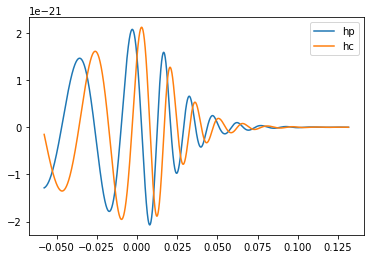

In [8]:
plt.plot(hp.sample_times,hp,label='hp')
plt.plot(hc.sample_times,hc,label='hc')
plt.legend()

In [9]:
ipeak = np.argmax(hp**2 + hc**2)

In [10]:
ipeak

995

In [11]:
hp.sample_times[ipeak]

0.003058172468750002

In [12]:
#Therefore the LVK's tc should be:
lvksample['geocent_time'][ii] + hp.sample_times[ipeak]

1242442967.4074538

# PyRing starting time

In [13]:
from pycbc.detector import Detector

In [14]:
det = Detector('H1')

In [15]:
dt = det.time_delay_from_earth_center(lvksample['ra'][ii],
                                lvksample['dec'][ii],
                                lvksample['geocent_time'][ii]+hp.sample_times[ipeak])

In [16]:
dt

0.021103421148987566

In [17]:
lvksample['geocent_time'][ii] + dt + hp.sample_times[ipeak]

1242442967.4285572

In [18]:
lvksample['geocent_time'][ii] + hp.sample_times[ipeak]

1242442967.4074538

In [19]:
lvksample['ra'][ii]

6.13096408316366

In [20]:
lvksample['dec'][ii]

-0.8909755308124316

# Collin's starting time

In [21]:
dtcollin = det.time_delay_from_earth_center(3.5,
                                0.73,
                                1242442967.445)

In [22]:
dtcollin

-0.019103083710783276

In [23]:
dtcollin + 1242442967.445

1242442967.425897

In [27]:
10**1.5

31.622776601683793